- Make set of dots on a plane with several jellieses.
- Apply to this dataset algorithms k-means and Dbscan.
- Visualize results.
- Estimate clustering quality results with silhouette metric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')

# Importing data 

We will try to find clusters in mall customers dataset. 

In [2]:
data = pd.read_csv('../data/mall_customers.csv', index_col='CustomerID')
display(data)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


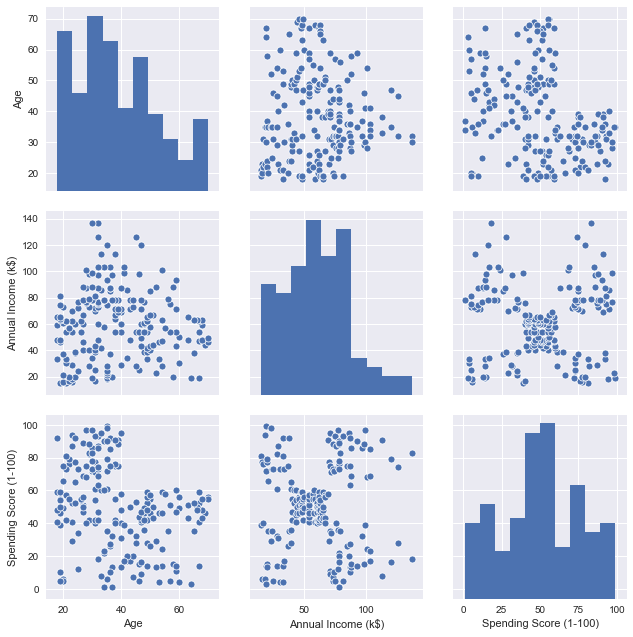

In [3]:
sns.pairplot(data, height=3)
plt.show()

We see some kind of clusters in dependency of spending score with income.

# Clustering 

In [4]:
# Selecting last 2 columns.
X = np.array(data.iloc[:, 2:])

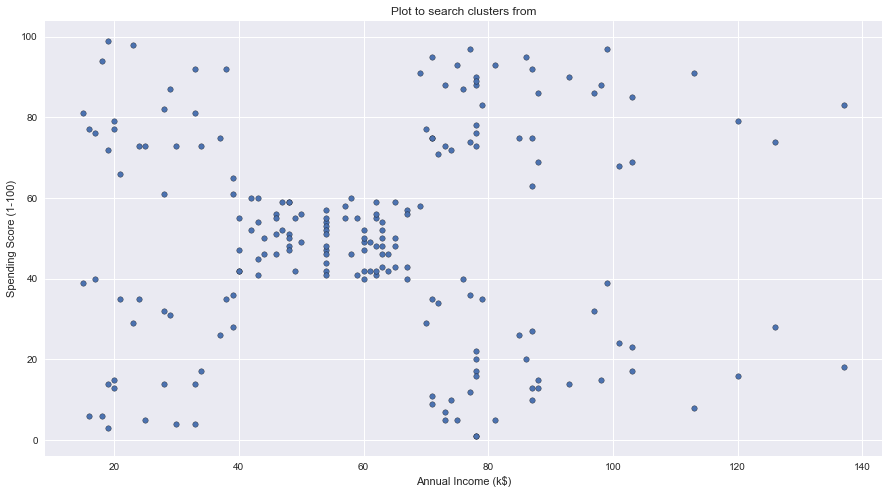

In [5]:
# Building plot of what we are clustering.
plt.figure(figsize=(15, 8))

plt.scatter(X[:, 0], X[:, 1], s=30, edgecolor='k')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot to search clusters from')

plt.show()

## k-means

In [6]:
def kmeans_cluster_analysis(X, range_n_clusters):
    """Building k-means cluster analysis.
    
    Copied from:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    
    Args:
        X (ndarray<ndarray, ndarray>): 2-D array of samples.
        range_n_clusters (list<int>): List of number of classes.
    """

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])

        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is : {:.2f}".format(silhouette_avg))

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Annual Income (k$)")
        ax2.set_ylabel("Spending Score (1-100)")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.30
For n_clusters = 3 The average silhouette_score is : 0.47
For n_clusters = 4 The average silhouette_score is : 0.49
For n_clusters = 5 The average silhouette_score is : 0.55
For n_clusters = 6 The average silhouette_score is : 0.54
For n_clusters = 7 The average silhouette_score is : 0.53


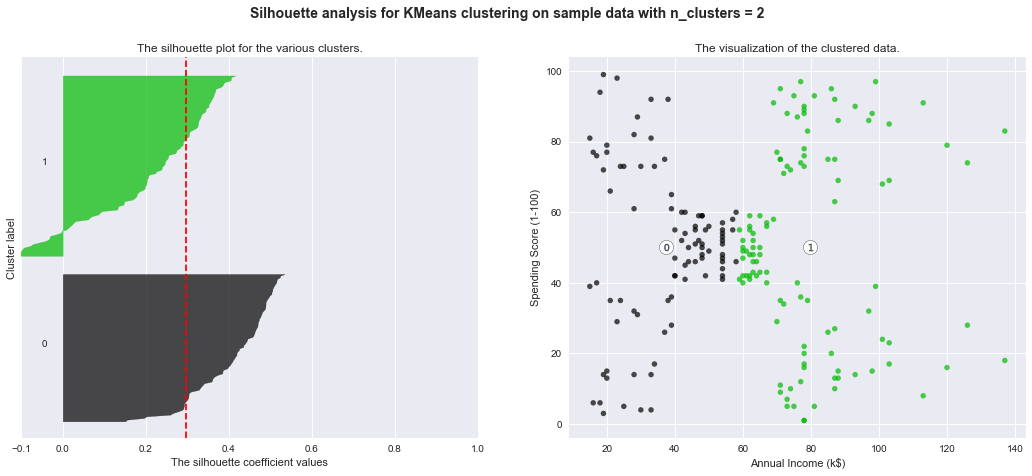

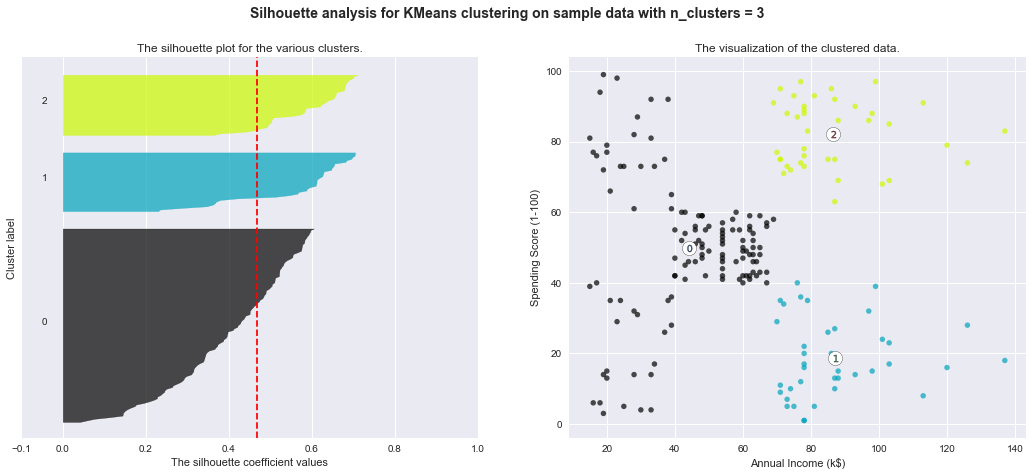

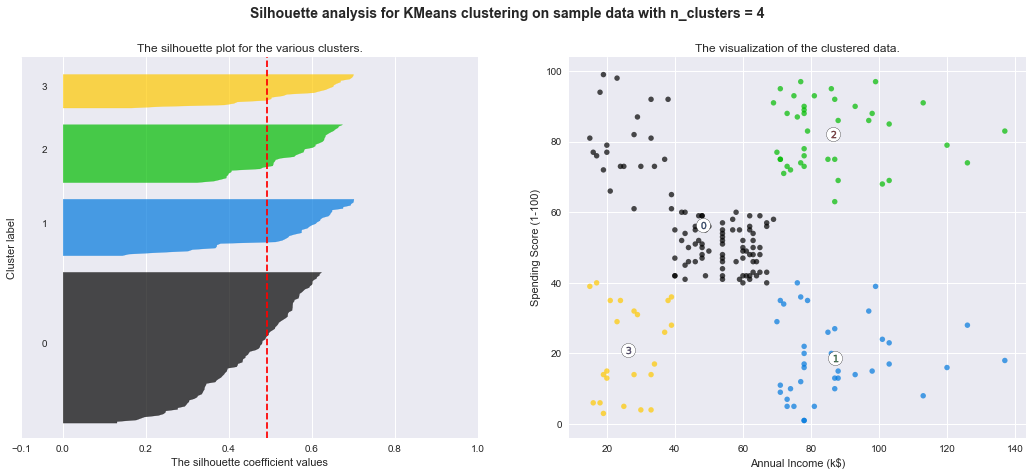

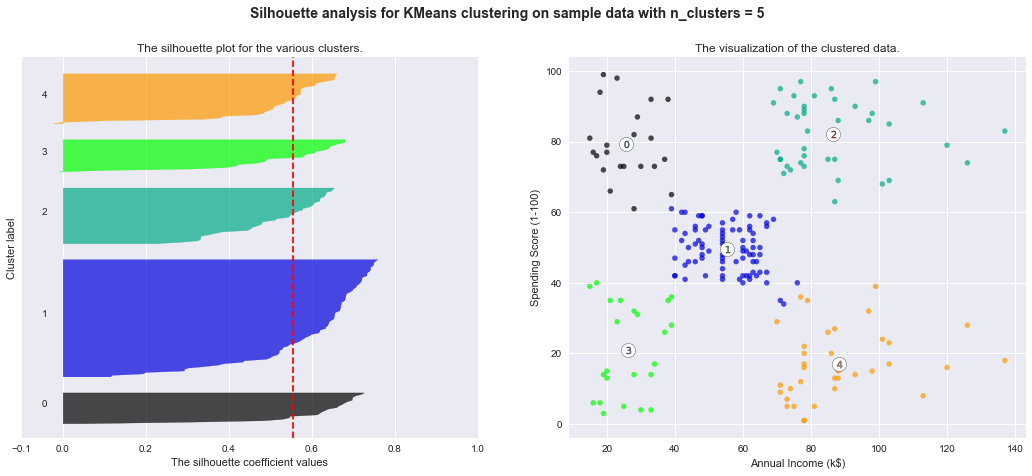

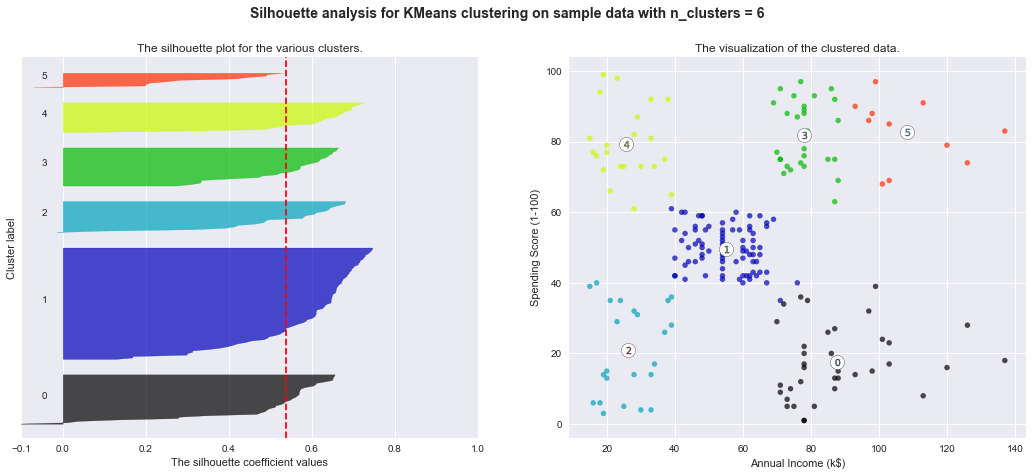

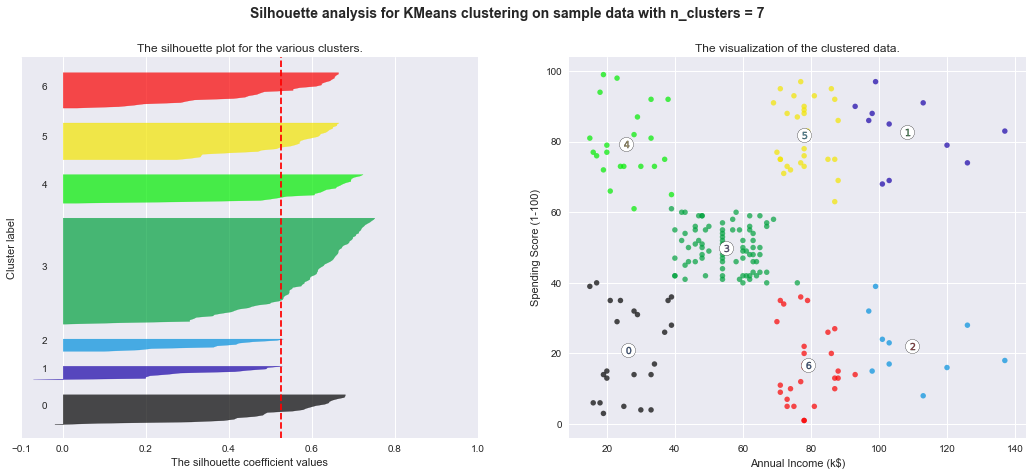

In [7]:
kmeans_cluster_analysis(X=X, range_n_clusters=list(range(2, 8)))

So we see that best number of classes is $5$.

For n_clusters = 5 The average silhouette_score is : 0.55


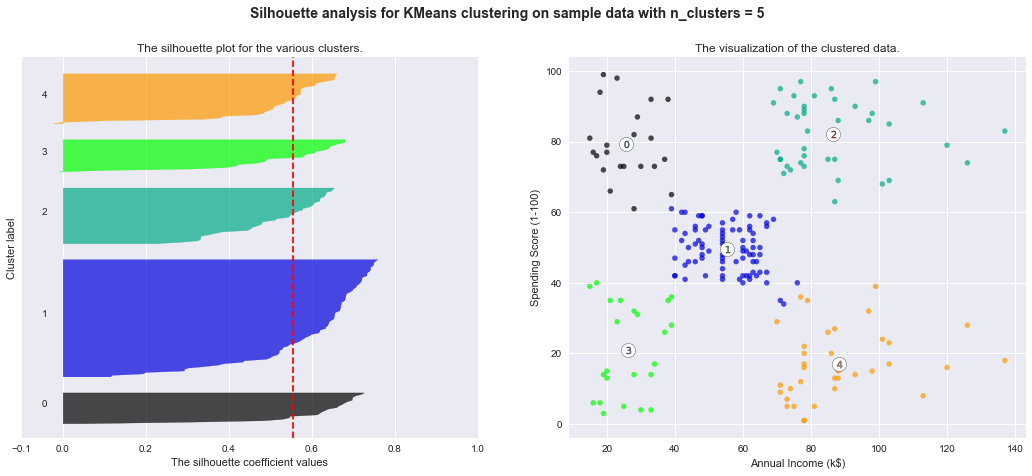

In [8]:
kmeans_cluster_analysis(X=X, range_n_clusters=[5])

## DBSCAN 

In [9]:
def dbscan_cluster_analysis(X, eps=0.3, min_samples=8):
    """Building dbscan cluster analysis.
    
    Copied from:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
    
    Args:
        eps (float): The maximum distance between two samples 
                     for one to be considered as in the 
                     neighborhood of the other.
        min_samples (float): The number of samples (or total weight) 
                             in a neighborhood for a point to be 
                             considered as a core point.
    """

    # Scaling 
    X = StandardScaler().fit_transform(X)

    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('Maximum distance: %0.2f' % eps)
    print('Number of samples: %d' % min_samples)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')        
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [10]:
# Defining parameters ranges we want to calculate metric.
eps_range = np.arange(0.3, 0.4, 0.1)
min_samples_range = np.arange(3, 10, 1)

Maximum distance: 0.30
Number of samples: 3
Estimated number of clusters: 9
Estimated number of noise points: 14
Silhouette Coefficient: 0.414


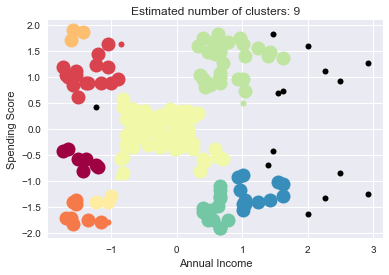

Maximum distance: 0.30
Number of samples: 4
Estimated number of clusters: 8
Estimated number of noise points: 23
Silhouette Coefficient: 0.384


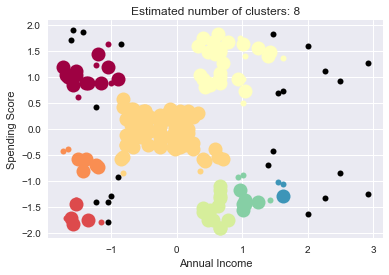

Maximum distance: 0.30
Number of samples: 5
Estimated number of clusters: 7
Estimated number of noise points: 35
Silhouette Coefficient: 0.316


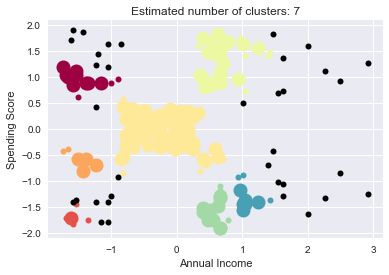

Maximum distance: 0.30
Number of samples: 6
Estimated number of clusters: 6
Estimated number of noise points: 48
Silhouette Coefficient: 0.250


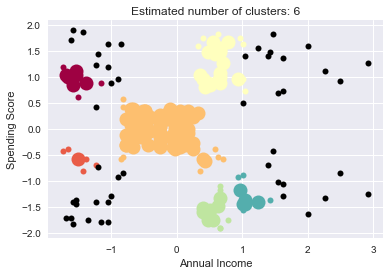

Maximum distance: 0.30
Number of samples: 7
Estimated number of clusters: 4
Estimated number of noise points: 72
Silhouette Coefficient: 0.231


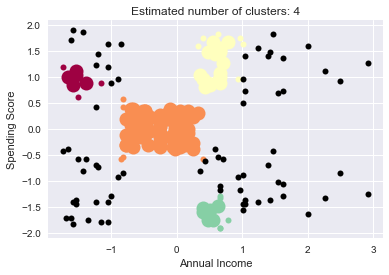

Maximum distance: 0.30
Number of samples: 8
Estimated number of clusters: 5
Estimated number of noise points: 72
Silhouette Coefficient: 0.194


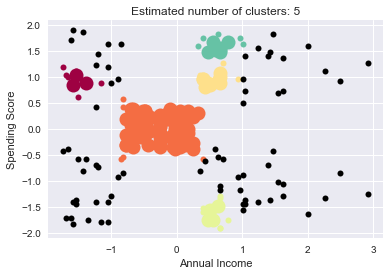

Maximum distance: 0.30
Number of samples: 9
Estimated number of clusters: 4
Estimated number of noise points: 86
Silhouette Coefficient: 0.146


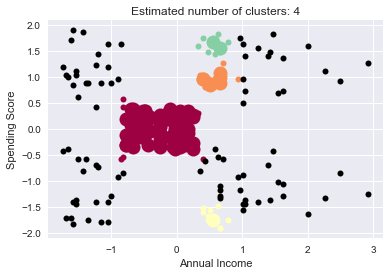

Maximum distance: 0.40
Number of samples: 3
Estimated number of clusters: 4
Estimated number of noise points: 10
Silhouette Coefficient: 0.363


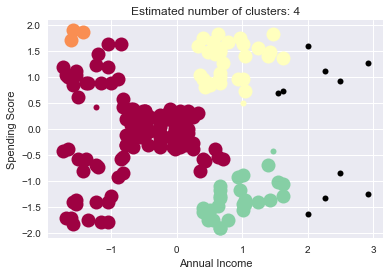

Maximum distance: 0.40
Number of samples: 4
Estimated number of clusters: 3
Estimated number of noise points: 14
Silhouette Coefficient: 0.398


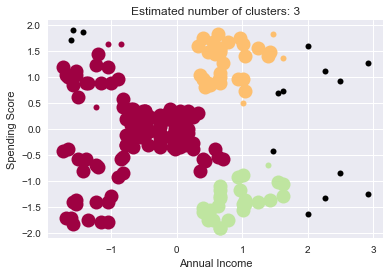

Maximum distance: 0.40
Number of samples: 5
Estimated number of clusters: 4
Estimated number of noise points: 15
Silhouette Coefficient: 0.413


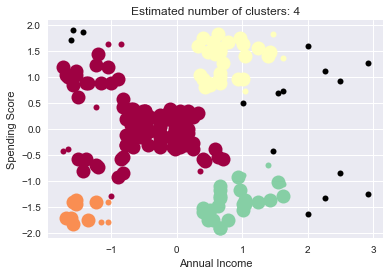

Maximum distance: 0.40
Number of samples: 6
Estimated number of clusters: 4
Estimated number of noise points: 19
Silhouette Coefficient: 0.404


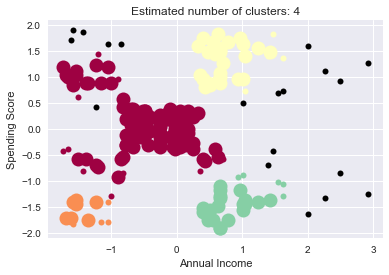

Maximum distance: 0.40
Number of samples: 7
Estimated number of clusters: 4
Estimated number of noise points: 20
Silhouette Coefficient: 0.404


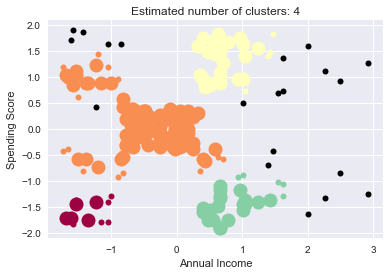

Maximum distance: 0.40
Number of samples: 8
Estimated number of clusters: 5
Estimated number of noise points: 25
Silhouette Coefficient: 0.415


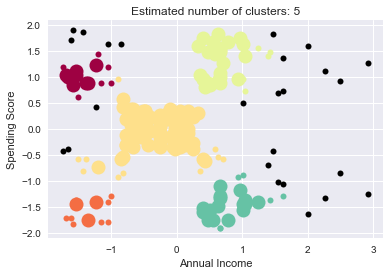

Maximum distance: 0.40
Number of samples: 9
Estimated number of clusters: 4
Estimated number of noise points: 45
Silhouette Coefficient: 0.345


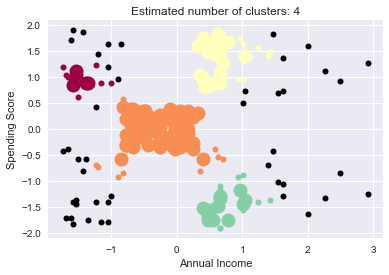

In [11]:
# Calculating metric and building plot
# for each set of parameters.
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan_cluster_analysis(X=X, eps=eps, min_samples=min_samples)

Best silhouette coefficent achieved when maximum distance = 0.3 and number of samples = 3.

Maximum distance: 0.30
Number of samples: 3
Estimated number of clusters: 9
Estimated number of noise points: 14
Silhouette Coefficient: 0.414


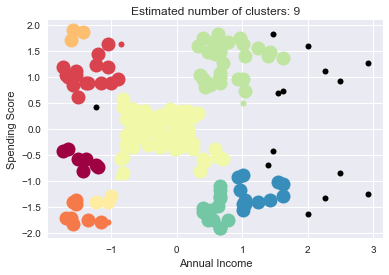

In [12]:
dbscan_cluster_analysis(X=X, eps=0.3, min_samples=3)